In [1]:
import numpy as np
import scipy.io
import os
import matplotlib.pyplot as plt
from scipy import optimize

In [2]:
os.getcwd()

'C:\\Users\\Usuario\\Google Drive\\Machine-Learning\\AndrewNg-MachineLearning\\Exercise3'

# Multi-class Classification

In [4]:
data = scipy.io.loadmat('Data/ex3data1.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [5]:
X = data['X']
y = data['y']
y = np.squeeze(y)
y = np.where(y == 10, 0, y)

In [6]:
m, n = X.shape

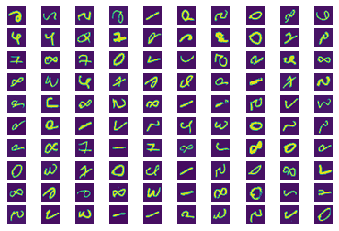

In [7]:
rows = np.random.randint(0,m-1, size=100)
k=0
fig, axs = plt.subplots(10, 10)
for i in range(10):
    for j in range(10):
        digits = X[rows[k],:].reshape(20,20)
        axs[i,j].imshow(digits)
        axs[i,j].axis('off')
        k+=1

In [8]:
def sigmoid(z):
    return 1/(1 +  np.exp(-z))

In [9]:
# Vector version: it's complicated.
# def costFunctionReg(theta, X, y, Lambda):
#     '''
#         theta = [theta0, theta1,...,theta_n]
#         X_trainnig = is a matrix of mx(n+1)
#         y_trainnig = [y^(1),...,y^(m)]
#         where n the number of features and m the training examples
#     '''
#     m = len(y)
#     h_theta = sigmoid(X@theta)
#     costTerm = -(1/m)*(np.dot(y.T,np.log(h_theta))[0] + np.dot((1-y.T),np.log(1- h_theta)))[0]
#     #costTerm = -(1/m)*(sum(y * np.log(h_theta)) + sum((1-y) * np.log(1- h_theta)))
#     regularizationTerm = (Lambda/(2*m))*(np.linalg.norm(theta[1:])**2)
#     J = costTerm + regularizationTerm  
    
#     #gradient
#     error = h_theta - y
#     N = len(theta) 
#     grad = np.zeros([N,1])
#     grad[0,0] = (1/m)*np.dot(X[:,0:1].T, error)
#     grad[1:,0:1] = (1/m)*np.dot(X[:,1:].T, error) + (Lambda/m)*theta[1:]
#     return J, grad
# theta = np.zeros([n,1])
# cost, grad = costFunctionReg(theta, X, y, 1)

In [10]:
def costFunctionReg(theta, X, y, Lambda):
    '''
        theta = [theta0, theta1,...,theta_n]
        X_trainnig = is a matrix of mx(n+1)
        y_trainnig = [y^(1),...,y^(m)]
        where n the number of features and m the training examples
    '''
    m = len(y)
    h_theta = sigmoid(X@theta.T)
    costTerm = -(1/m)*(np.dot(y , np.log(h_theta)) + np.dot((1-y), np.log(1- h_theta)))
    regularizationTerm = (Lambda/(2*m))*(np.linalg.norm(theta[1:])**2)
    J = costTerm + regularizationTerm  
    
    #gradient
    error = h_theta - y
    N = len(theta) 
    grad = np.zeros(N)
    grad[0] = (1/m)*np.dot(error, X[:,0])
    grad[1:] = (1/m)*np.dot(error, X[:,1:]) + (Lambda/m)*theta[1:]
    return J, grad

In [11]:
X = data['X']
X = np.concatenate((np.ones([m,1]),X), axis=1)
X

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [12]:
def oneVsAll(X, y, Lambda):
    K = len(np.unique(y))
    n = X.shape[1] - 1
    theta = np.zeros([K,n+1])
    theta_inicial = np.zeros(n+1)
    Y = np.tile(y, (K,1))
    for k in range(K):
        Y[k,:] = np.where(Y[k,:] == k, 1, 0) 
        result = optimize.minimize(costFunctionReg, x0=theta_inicial, jac = True,args=(X, Y[k,:], Lambda), method='CG')
        theta[k,:] = result.x
    return theta

In [13]:
def prediction(X,y,theta):
    m = len(y)
#     prediction_digit = np.zeros(m)
#     probability = np.zeros(m)
#     for j in range(m):
#         p = sigmoid(theta@X[j,:])
#         prediction_digit[j] = np.argmax(p) #np.where(p == max(p))[0]
#         probability[j] = max(p) #p[np.where(p == max(p))][0]
    p = sigmoid(theta@X.T)
    prediction_digit = np.argmax(p, axis=0)
    probability = np.max(p, axis=0)
    return prediction_digit, probability  

In [14]:
Lambda = 0.1
theta = oneVsAll(X, y, Lambda)

In [15]:
predicted, probability = prediction(X,y,theta)
# correct = np.zeros(m)
# for j in range(m):
#     if y[j] == predicted[j]:
#             correct[j] = 1
correct = np.where(y == predicted, 1, 0)
print(f'Accuracy = {100*np.mean(correct)}%')

Accuracy = 96.46000000000001%


# Neural Networks

In [16]:
weight = scipy.io.loadmat('Data/ex3weights.mat')
weight.keys()
Theta1 = weight['Theta1']
Theta2 = weight['Theta2']

In [17]:
Theta1.shape

(25, 401)

In [18]:
Theta2.shape

(10, 26)

In [19]:
X.shape

(5000, 401)

In [20]:
def predictNeuralNetwork(X,Theta1, Theta2):
    m = X.shape[0]
    prediction_digit = np.zeros(m)
    probability = np.zeros(m)
    a1 = X
    z2 = Theta1@X.T
    a2 = sigmoid(z2)
    z3 = Theta2 @ np.concatenate((np.ones([1,m]), a2), axis=0)
    a3 = sigmoid(z3)
    M = np.argmax(a3, axis=0) + 1 
    prediction_digit = np.where(M==10,0,M)
    probability = np.max(a3, axis=0) #in each row find the maximum
#     for j in range(m):  
#         a1 = X[j,:]
#         z2 = Theta1@a1
#         a2 = sigmoid(z2)
#         z3 = Theta2@np.concatenate((np.array([1]),a2)) #add the bias unit
#         a3 = sigmoid(z3)
#         if np.argmax(a3) + 1 == 10:
#             prediction_digit[j] = 0
#         else:
#             prediction_digit[j] = np.argmax(a3) + 1 #np.where(a3 == max(a3))[0] + 1 #digit 1,...,10 NOT 0,...,9
#         probability[j] = max(a3) #p[np.where(p == max(p))][0]
    return prediction_digit, probability      

In [21]:
predicted, probability = predictNeuralNetwork(X,Theta1, Theta2)
correct = np.zeros(m)
# for j in range(m):
#     if y[j] == predicted[j]:
#             correct[j] = 1
correct = np.where(y == predicted, 1, 0)
print(f'Accuracy = {100*np.mean(correct)}%')

Accuracy = 97.52%


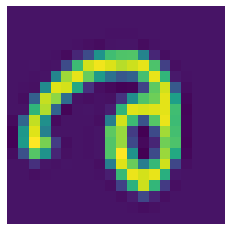

In [30]:
#Prediction of new examples
row = np.random.randint(0, m-1)
for i in range(10):
    for j in range(10):
        digits = X[row,1:].reshape(20,20)
        plt.imshow(digits)
        plt.axis('off')
predicted, probability = predictNeuralNetwork(X[row:row+1,:],Theta1, Theta2)

In [31]:
print(f'The digit is {int(predicted[0])}')

The digit is 6
